## ⏱️ Patient Wait Time Clustering

To better understand patient flow and identify patterns in waiting times, I applied **K-Means clustering** on the `Patient Waittime` data.  
This unsupervised learning approach helps segment patients into distinct groups based on their wait duration, enabling the hospital to optimize **resource allocation**, reduce delays, and improve **overall patient experience**.  


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Step 2: Load dataset
df = pd.read_csv("Hospital Emergency Room Data.csv")

In [3]:
# Step 3: Select feature (Wait Time)
X = df[['Patient Waittime']].values

In [4]:
# Step 4: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

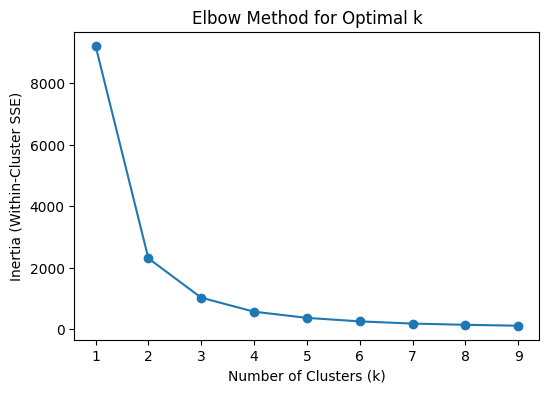

In [5]:
# Step 5: Use Elbow Method to choose optimal clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [6]:
# Step 6: Apply KMeans (choose k=3 as an example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Waittime_Cluster'] = kmeans.fit_predict(X_scaled)

In [7]:
# Step 7: Analyze clusters
print(df.groupby('Waittime_Cluster')['Patient Waittime'].describe())

                   count       mean       std   min   25%   50%   75%   max
Waittime_Cluster                                                           
0                 2825.0  17.488496  4.608769  10.0  14.0  17.0  22.0  25.0
1                 3320.0  51.548494  5.199027  43.0  47.0  52.0  56.0  60.0
2                 3071.0  33.998372  4.883362  26.0  30.0  34.0  38.0  42.0


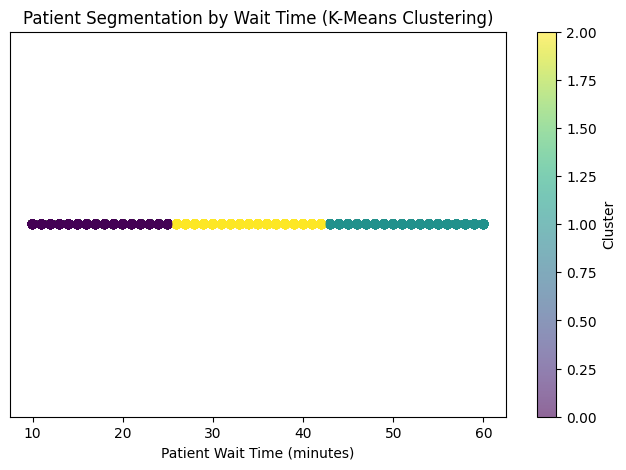

In [8]:
# Step 8: Visualize clusters
plt.figure(figsize=(8,5))
plt.scatter(df['Patient Waittime'], [0]*len(df), 
            c=df['Waittime_Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Patient Wait Time (minutes)")
plt.title("Patient Segmentation by Wait Time (K-Means Clustering)")
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

## 🏥 Conclusion: Patient Wait Time Segmentation (K-Means Clustering)

The K-Means clustering analysis segmented patients into **three distinct wait-time groups**:

- **Cluster 0 (Short Waits):** Patients with wait times around *10–25 minutes*.  
  - Represents efficient patient handling and lower congestion.  
- **Cluster 1 (Moderate Waits):** Patients with wait times around *26–42 minutes*.  
  - Indicates moderate delays, likely due to peak-hour traffic or limited resources.  
- **Cluster 2 (Long Waits):** Patients with wait times around *43–60 minutes*.  
  - Highlights significant delays where resource constraints or bottlenecks exist.  

### 📊 Key Insights:
- Most patients fall into **Cluster 1**, showing a typical wait range of ~30–40 minutes.  
- **Cluster 2** patients face the highest risk of dissatisfaction and require immediate operational interventions.  
- This segmentation enables **data-driven resource allocation**, such as increasing staff availability or optimizing patient flow during peak hours to reduce long wait times.  

### ✅ Business Impact:
By targeting improvements for Cluster 2 patients, the hospital can:  
- **Reduce average wait times** across departments.  
- **Improve patient satisfaction scores**.  
- **Enhance operational efficiency** through proactive resource planning.  
